The Ising model is a mathematical model of a ferromagnet. It can be used to simulate the behavior of a lattice of magnetic spins, where each spin can have one of two states (up or down).

Here is some example Python code that simulates the Ising model using the Metropolis algorithm:

In [1]:
import numpy as np

# Parameters
L = 64  # Lattice size
T = 2.0  # Temperature
J = 1.0  # Coupling constant

# Initialize lattice of spins
spins = np.random.choice([-1, 1], (L, L))

# Run simulation
for i in range(1000):
    for j in range(L*L):
        x = np.random.randint(L)
        y = np.random.randint(L)

        # Calculate energy change if spin is flipped
        deltaE = 2 * J * spins[x, y] * (spins[(x+1)%L, y] + spins[x, (y+1)%L])

        # Flip spin with probability exp(-deltaE/T)
        if deltaE <= 0 or np.random.rand() < np.exp(-deltaE/T):
            spins[x, y] = -spins[x, y]


This code uses the Metropolis algorithm to simulate the Ising model for a 2D lattice of spins. The lattice is initialized with random spins, and the temperature and coupling constant are set to specific values. The simulation is run for 1000 iterations, and in each iteration, a random spin is chosen and its state is potentially flipped based on the energy change that would result.

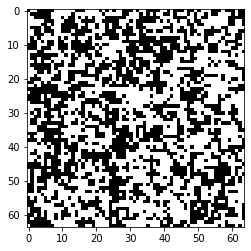

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Run simulation of the Ising model
# ...

# Plot the simulation
plt.imshow(spins, cmap='binary', interpolation='nearest')
plt.show()


This code uses the imshow function from Matplotlib to create an image of the simulation. The spins array, which stores the state of each spin in the lattice, is passed to imshow as the first argument. The cmap argument is set to 'binary' to use a black-and-white color map, and the interpolation argument is set to 'nearest' to show the spins as squares rather than interpolated pixels. Finally, the show function is used to display the plot.

You could also use the pcolormesh function that could display a grid of colored rectangles. It can be useful if you have a lattice with different bond strength.

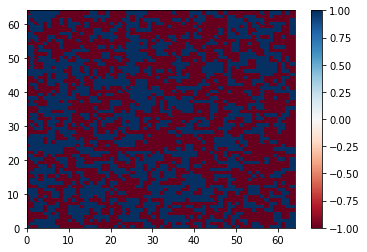

In [3]:
plt.pcolormesh(spins,cmap='RdBu',edgecolors='face')
plt.colorbar()
plt.show()


You can customize the visualization as you desire, like adding labels, title, or annotations, playing with the colormaps, etc.

Also, it's worth noting that visualizing large systems can be demanding for your machine, so it's a good idea to subsample the data to display.

# TIme evolution
A more sophisticated simulation of the Ising model that evolves over time, and uses the Wolff algorithm for cluster flips, and also uses the matplotlib library to visualize the simulation's evolution:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

# Parameters
L = 64  # Lattice size
T = 2.0  # Temperature
J = 1.0  # Coupling constant
steps = 10 # Number of steps

# Initialize lattice of spins
spins = np.random.choice([-1, 1], (L, L))

# Wolff algorithm
def Wolff_step(spins, J, T):
    """Perform one step of the Wolff algorithm on the Ising model"""
    L = spins.shape[0]
    for i in range(L):
        for j in range(L):
            if np.random.rand() < 1 - np.exp(-2*J/T):
                cluster = []
                stack = [(i, j)]
                spins[i, j] *= -1
                while stack:
                    x, y = stack.pop()
                    cluster.append((x, y))
                    for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
                        x_new, y_new = (x+dx)%L, (y+dy)%L
                        if spins[x_new, y_new] == spins[x, y] and (x_new, y_new) not in cluster:
                            if np.random.rand() < 1 - np.exp(-2*J/T):
                                spins[x_new, y_new] *= -1
                                stack.append((x_new, y_new))
    return spins

# Simulation
fig, ax = plt.subplots()
im = ax.imshow(spins, cmap='RdBu', interpolation='nearest')

def animate(i):
    global spins
    spins = Wolff_step(spins, J, T)
    im.set_data(spins)
    return [im]

ani = animation.FuncAnimation(fig, animate, frames=steps, repeat=False)
plt.show()


This example uses the Wolff algorithm for cluster flips and the FuncAnimation class from the matplotlib.animation module to create an animation that shows the evolution of the simulation over time. The animation is displayed using the show function from matplotlib.pyplot.

The Wolff_step function performs a single step of the Wolff algorithm, which is called by the animate function for each step of the animation. The animate function updates the data displayed in the plot (i.e the spins state) and the animation is performed by the FuncAnimation object using the frames argument to specify the number of steps and it is set to run only once by repeat=False.

You can customize the animation as you desire, like changing the frames per second, saving the animation to a file, etc.

As you can see this simulation requires a more computational power and may take some time to run.